In [1]:
!pip install openflexure_microscope_client

     |████████████████████████████████| 66 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 6.8 MB/s eta 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.1.1
    Uninstalling Pillow-8.1.1:
      Successfully uninstalled Pillow-8.1.1
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [9]:
import openflexure_microscope_client as ofm_client
import matplotlib.pyplot as plt
import numpy as np

In [10]:
microscope = ofm_client.MicroscopeClient("microscope")

Active microscope extensions
org.openflexure.autofocus
org.openflexure.scan
org.openflexure.zipbuilder
org.openflexure.autostorage
org.openflexure.calibration.picamera
org.openflexure.camera_stage_mapping


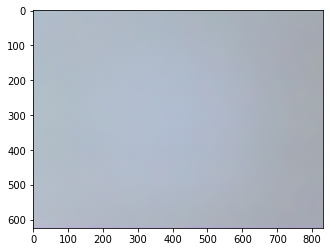

In [11]:
pos = microscope.position
starting_pos = pos.copy()
pos['x'] += 100
microscope.move(pos)
assert microscope.position == pos
pos['x'] -= 100
microscope.move(pos)
assert microscope.position == starting_pos

# Check the microscope will autofocus
ret = microscope.autofocus()

# Acquire an image for sanity-checking too
image = microscope.grab_image()
f, ax = plt.subplots(1,1)
ax.imshow(np.array(image))
#print(image.metadata)
print("Active microscope extensions")
for k in microscope.extensions.keys():
    print(k)
